In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [4]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='C:\\Users\\SULEMAN\\tensorflow_datasets\\rock_paper_scissors\\3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-d

In [5]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


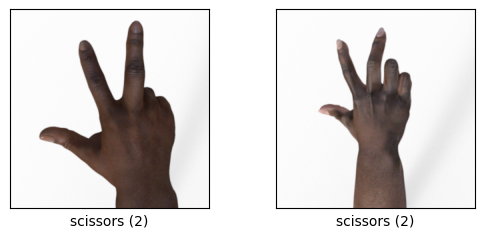

In [80]:

fig = tfds.show_examples(info, ds_train, rows=1, cols=2)


Converting into Numpy 

In [16]:



# Initialize lists to store images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []

# Function to extract only the red channel
def extract_red_channel(image):
    return tf.gather(image, [0], axis=-1)


# Iterate over the training dataset to extract images and labels
for example in ds_train:
    image, label = example["image"], example["label"]
    red_channel_image = extract_red_channel(image)
    train_images.append(red_channel_image.numpy())
    train_labels.append(label.numpy())

# Iterate over the test dataset to extract images and labels
for example in ds_test:
    image, label = example["image"], example["label"]
    red_channel_image = extract_red_channel(image)
    test_images.append(red_channel_image.numpy())
    test_labels.append(label.numpy())

# Convert lists to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Check the shapes
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (2520, 300, 300, 1)
Train labels shape: (2520,)
Test images shape: (372, 300, 300, 1)
Test labels shape: (372,)


In [17]:
train_images.dtype

dtype('uint8')

In [19]:
# Convert images to float32 during preprocessing
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Convert images to float32 and scale to [0, 1] range
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

Training a simple Neural Network

In [27]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=train_images.shape[1:]),  # Flatten the input images
    keras.layers.Dense(20,  activation='relu'),
    keras.layers.Dense(7,activation='relu'),
    keras.layers.Dense(3, activation='linear')# Linear activation function as logits are used for SparseCategoricalCrossentropy
])

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 3s 30ms/step - loss: 2.1696 - accuracy: 0.3413
Epoch 2/5
79/79 [==============================] - 2s 21ms/step - loss: 1.0987 - accuracy: 0.3266
Epoch 3/5
79/79 [==============================] - 2s 27ms/step - loss: 1.0987 - accuracy: 0.3238
Epoch 4/5
79/79 [==============================] - 2s 25ms/step - loss: 1.0987 - accuracy: 0.3310
Epoch 5/5
79/79 [==============================] - 2s 25ms/step - loss: 1.0987 - accuracy: 0.3282


the model is not performing well, as indicated by the high loss and low accuracy. 
Model Complexity: The model is relatively simple, with only three dense layers. While simplicity can be beneficial, this model might lack the capacity to learn complex patterns in the data.

Activation Functions: ReLU activation functions are commonly used and work well in many cases, but they might not be optimal for every scenario. You might experiment with different activation functions or add more layers to increase the model's expressive power.

Output Layer Activation: Using linear activation in the output layer with logits and then applying SparseCategoricalCrossentropy loss is a valid approach. However, you might still try using softmax activation in the output layer, especially if you're looking for probabilities as outputs.

Optimizer and Learning Rate: While Adam optimizer is a good choice in many cases, adjusting the learning rate might be beneficial. You can try reducing or increasing the learning rate and observe the effect on training.

Regularization: Adding regularization techniques like dropout or L2 regularization can help prevent overfitting and improve generalization performance.

Training CNN

In [28]:
model = keras.Sequential([
   keras.layers.Conv2D(10, 3, activation='relu', input_shape=(300,300,1)),
   keras.layers.Conv2D(5, 3, activation='relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=2, batch_size=32)

Epoch 1/2
79/79 [==============================] - 18s 225ms/step - loss: 1.6723 - accuracy: 0.7468
Epoch 2/2
79/79 [==============================] - 18s 234ms/step - loss: 0.0844 - accuracy: 0.9881


In [29]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 62ms/step - loss: 0.8252 - accuracy: 0.6882


[0.8251669406890869, 0.6881720423698425]

Training Performance:

Training Loss: 0.0844
Training Accuracy: 98.81%
The model achieved a very low training loss and high training accuracy. This suggests that the model has effectively learned to classify the training data, achieving high accuracy on the data it was trained on.

Testing Performance:

Testing Loss: 0.8252
Testing Accuracy: 68.82%
The model achieved a higher testing loss and lower testing accuracy compared to the training set. This indicates that the model's performance on unseen data (testing data) is not as good as its performance on the training data. It's expected for the testing accuracy to be lower than the training accuracy, but a large disparity may indicate overfitting.

Overfitting:

The significant difference between the training and testing accuracy (98.81% vs. 68.82%) suggests that the model might be overfitting to the training data. Overfitting occurs when the model learns to memorize the training data instead of generalizing well to new, unseen data.
Generalization:

The testing accuracy of 68.82% indicates that the model is able to generalize to some extent, as it performs better than random guessing. However, there is room for improvement in terms of generaliza



If the high-resolution images are not necessary for capturing the relevant features for our task, we can indeed consider reducing the resolution of the input images. Adding an average pooling layer as the first layer can be an effective way to achieve this.

Average pooling reduces the spatial dimensions (height and width) of the input feature maps by taking the average value within each pooling window. This downsampling operation helps in reducing the computational load and the number of parameters in the model while still preserving the important features.tion performance.

In [34]:
model = keras.Sequential([
   # Combined pooling layer
   keras.layers.AveragePooling2D((6, 2), input_shape=(300, 300, 1)),
   keras.layers.MaxPooling2D((2, 2)),
   # Convolutional layers
   keras.layers.Conv2D(10, 3, activation='relu', input_shape=(300,300,1)),
   keras.layers.Conv2D(5, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Flatten(),
   #Dense layers
   
   keras.layers.Dense(3, activation='softmax')
    
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=2, batch_size=32)

Epoch 1/2
79/79 [==============================] - 4s 44ms/step - loss: 0.9517 - accuracy: 0.6206
Epoch 2/2
79/79 [==============================] - 4s 50ms/step - loss: 0.4892 - accuracy: 0.8770


In [34]:
model = keras.Sequential([
   # Combined pooling layer
   keras.layers.AveragePooling2D((6, 2), input_shape=(300, 300, 1)),
   keras.layers.MaxPooling2D((2, 2)),
   # Convolutional layers
   keras.layers.Conv2D(10, 3, activation='relu', input_shape=(300,300,1)),
   keras.layers.Conv2D(5, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Flatten(),
   #Dense layers
   
   keras.layers.Dense(3, activation='softmax')
    
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=2, batch_size=32)

Epoch 1/2
79/79 [==============================] - 4s 44ms/step - loss: 0.9517 - accuracy: 0.6206
Epoch 2/2
79/79 [==============================] - 4s 50ms/step - loss: 0.4892 - accuracy: 0.8770


In [34]:
model = keras.Sequential([
   # Combined pooling layer
   keras.layers.AveragePooling2D((6, 2), input_shape=(300, 300, 1)),
   keras.layers.MaxPooling2D((2, 2)),
   # Convolutional layers
   keras.layers.Conv2D(10, 3, activation='relu', input_shape=(300,300,1)),
   keras.layers.Conv2D(5, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Flatten(),
   #Dense layers
   
   keras.layers.Dense(3, activation='softmax')
    
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=2, batch_size=32)

Epoch 1/2
79/79 [==============================] - 4s 44ms/step - loss: 0.9517 - accuracy: 0.6206
Epoch 2/2
79/79 [==============================] - 4s 50ms/step - loss: 0.4892 - accuracy: 0.8770


In [36]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 0s 10ms/step - loss: 0.8479 - accuracy: 0.7392


[0.8479262590408325, 0.7392473220825195]

Training Loss and Accuracy:

Before adding pooling layers: Training loss of 0.0844 and accuracy of 0.9881.
After adding pooling layers: Training loss of 0.4892 and accuracy of 0.8770.
The training loss increased, and the training accuracy decreased after adding pooling layers. This indicates that the model might not be fitting the training data as well as before. However, the decrease in training accuracy is not substantial, suggesting that the model is still learning and making predictions on the training set.

Testing Loss and Accuracy:

Before adding pooling layers: Testing loss of 0.8252 and accuracy of 0.6882.
After adding pooling layers: Testing loss of 0.8479 and accuracy of 0.7392.
The testing loss slightly increased, and the testing accuracy slightly increased after adding pooling layers. This indicates that the model's generalization performance improved slightly on the unseen test data.

Comparison:

Before: Better training accuracy but poorer testing accuracy compared to after adding pooling layers.
After: Slightly worse training accuracy but slightly better testing accuracy compared to before adding pooling layers.
Pooling Layers:

Adding pooling layers reduces the spatial dimensions of the feature maps, which can help in reducing overfitting and improving generalization. It also reduces the computational load of the model.
However, the choice of pooling window sizes and their effects on the model's performance should be carefully considered and experimented witWe
Further Steps:

You can continue experimenting with different pooling window sizes, architectures, and hyperparameters to further optimize the model's performance.
Consider techniques such as regularization, data augmentation, and different optimization algorithms to improve generalization and reduce overfitting.
Overall, while the model's training accuracy slightly decreased after adding pooling layers, the model's testing accuracy improved slightly, suggesting a potential improvement in generalization performance. Continue refining the model based on these observations and experimentation.

Hyperparameter Tuning

In [37]:
pip install keras-tuner --upgrade

Note: you may need to restart the kernel to use updated packages.


In [52]:
from kerastuner.tuners import RandomSearch

In [55]:
import kerastuner as kt

# Define the function to build the model
def build_model(hp):
    model = keras.Sequential([
        # Combined pooling layer
        keras.layers.AveragePooling2D((6, 2), input_shape=(300, 300, 1)),
        keras.layers.MaxPooling2D((2, 2)),
    ])
    
    # Add convolutional layers based on hyperparameters
    for i in range(hp.Int('Conv_layers', min_value=0, max_value=3)):
        model.add(keras.layers.Conv2D(
            filters=hp.Choice(f'layer_{i}_filters', [16, 32, 64]),
            kernel_size=3,
            activation='relu'
        ))
        
    model.add(keras.layers.MaxPool2D(2, 2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(3, activation='softmax'))
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=2,
    #directory='random_search',
    #project_name='CNN_hyperparameter_tuning'
)

# Perform the search for best hyperparameters
tuner.search(train_images, train_labels, epochs=2, validation_data=(test_images, test_labels), batch_size=32)



Trial 2 Complete [00h 00m 11s]
val_loss: 0.9372547268867493

Best val_loss So Far: 0.7856927514076233
Total elapsed time: 00h 00m 18s


In [56]:
best_model = tuner.get_best_models()[0]

In [57]:
best_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 23ms/step - loss: 0.7857 - accuracy: 0.7366


[0.7856927514076233, 0.7365591526031494]

In [58]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (AverageP  (None, 50, 150, 1)       0         
 ooling2D)                                                       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 75, 1)        0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 23, 73, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 71, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 35, 16)       0         
 2D)                                                             
                                                        

In [59]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0 summary
Hyperparameters:
Conv_layers: 2
layer_0_filters: 16
layer_1_filters: 16
Score: 0.7856927514076233

Trial 1 summary
Hyperparameters:
Conv_layers: 3
layer_0_filters: 64
layer_1_filters: 16
layer_2_filters: 16
Score: 0.9372547268867493


In [73]:
best_model.save('./my_model_practice')

INFO:tensorflow:Assets written to: ./my_model_practice\assets


INFO:tensorflow:Assets written to: ./my_model_practice\assets


In [74]:
loaded_model = keras.models.load_model('./my_model_practice')

In [75]:
loaded_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 27ms/step - loss: 0.7857 - accuracy: 0.2554


[0.7856927514076233, 0.25537633895874023]

(300, 300, 3)

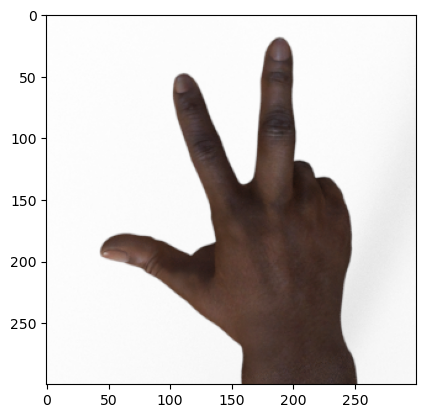

In [79]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(34)])
rgb_image = rgb_images[0]

image = train_images[2].reshape(300,300)

plt.imshow(rgb_image)

rgb_image.shape

Use Model to Predict Result for Single Example

In [64]:
result = best_model.predict(np.array([train_images[0]]))
print(result)

predicted_value = np.argmax(result)
print(predicted_value)

1/1 [==============================] - 0s 91ms/step
[[5.7897403e-05 1.7499983e-04 9.9976712e-01]]
2


The output of the predict method is a NumPy array containing the predicted probabilities for each class. In your case, the output is [[5.7897403e-05 1.7499983e-04 9.9976712e-01]].
Each element in the array represents the predicted probability of the corresponding class. For example, the first element represents the predicted probability of class 0, the second element represents the predicted probability of class 1, and so on.
In this case, the model has predicted a high probability (approximately 99.98%) for class 2 (index 2).
Argma've  ed np.argmax(result) to find the index of the highest probability in the predicted probabilities array. This index corresponds to the predicted class labeIn this casease, the highest probability is at index 2, indicating class 2 as the predicted label.